# Polynomial Regression

### Importing dataset

In [1]:
import pandas as pd

kung_san_data = pd.read_csv('height_weight_gender_Kung_San.csv')
kung_san_data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### We want to predict weight based on person's height
Here the predictor variable x = 'height' and target variable y = 'weight'

In [6]:
y = kung_san_data['weight'].values
x = kung_san_data['height'].values

type(y)
x

array([151.765 , 139.7   , 136.525 , 156.845 , 145.415 , 163.83  ,
       149.225 , 168.91  , 147.955 , 165.1   , 154.305 , 151.13  ,
       144.78  , 149.9   , 150.495 , 163.195 , 157.48  , 143.9418,
       121.92  , 105.41  ,  86.36  , 161.29  , 156.21  , 129.54  ,
       109.22  , 146.4   , 148.59  , 147.32  , 137.16  , 125.73  ,
       114.3   , 147.955 , 161.925 , 146.05  , 146.05  , 152.7048,
       142.875 , 142.875 , 147.955 , 160.655 , 151.765 , 162.8648,
       171.45  , 147.32  , 147.955 , 144.78  , 121.92  , 128.905 ,
        97.79  , 154.305 , 143.51  , 146.7   , 157.48  , 127.    ,
       110.49  ,  97.79  , 165.735 , 152.4   , 141.605 , 158.8   ,
       155.575 , 164.465 , 151.765 , 161.29  , 154.305 , 145.415 ,
       145.415 , 152.4   , 163.83  , 144.145 , 129.54  , 129.54  ,
       153.67  , 142.875 , 146.05  , 167.005 , 158.4198,  91.44  ,
       165.735 , 149.86  , 147.955 , 137.795 , 154.94  , 160.9598,
       161.925 , 147.955 , 113.665 , 159.385 , 148.59  , 136.5

### We shall use Scikit Learn Library

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
x.reshape(-1,1)

array([[151.765 ],
       [139.7   ],
       [136.525 ],
       [156.845 ],
       [145.415 ],
       [163.83  ],
       [149.225 ],
       [168.91  ],
       [147.955 ],
       [165.1   ],
       [154.305 ],
       [151.13  ],
       [144.78  ],
       [149.9   ],
       [150.495 ],
       [163.195 ],
       [157.48  ],
       [143.9418],
       [121.92  ],
       [105.41  ],
       [ 86.36  ],
       [161.29  ],
       [156.21  ],
       [129.54  ],
       [109.22  ],
       [146.4   ],
       [148.59  ],
       [147.32  ],
       [137.16  ],
       [125.73  ],
       [114.3   ],
       [147.955 ],
       [161.925 ],
       [146.05  ],
       [146.05  ],
       [152.7048],
       [142.875 ],
       [142.875 ],
       [147.955 ],
       [160.655 ],
       [151.765 ],
       [162.8648],
       [171.45  ],
       [147.32  ],
       [147.955 ],
       [144.78  ],
       [121.92  ],
       [128.905 ],
       [ 97.79  ],
       [154.305 ],
       [143.51  ],
       [146.7   ],
       [157.

### Model-1: Linear model

$$ \hat{y} = \hat{\theta}_0 + \hat{\theta}_1 x $$

In [14]:
model = LinearRegression()
model.fit(x.reshape(-1,1),y)  # Reshaping is done to make sure that x is a column vector 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
th_0_lin = model.intercept_

th_0_lin

-33.75613690832983

In [16]:
th_1_lin = model.coef_[0]

th_1_lin

0.5016993362336575

### Plotting regression line of the linear model along with data

In [18]:
import matplotlib.pyplot as plt

x_data_lin = np.linspace(np.min(x), np.max(x), 100)
y_data_lin = th_0_lin + th_1_lin * x_data_lin

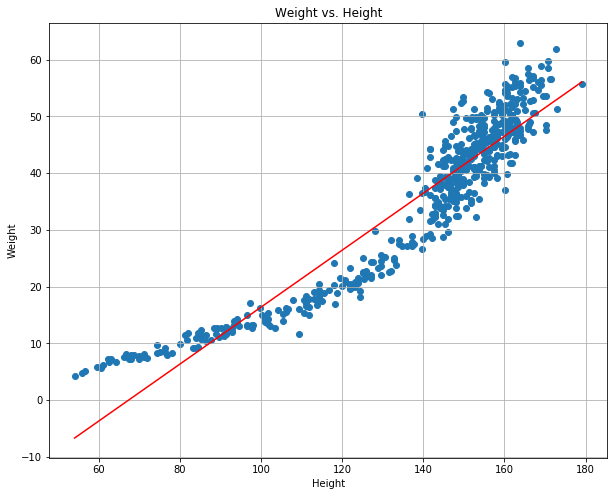

In [19]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.title("Weight vs. Height")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(x_data_lin, y_data_lin, color = 'r')
plt.grid()
plt.show()

### Prediction of linear model on entire dataset 

In [20]:
y_pred_lin = model.predict(x.reshape(-1,1))

### Performance evaluation of linear model

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
mse_lin = mean_squared_error(y_true = y, y_pred = y_pred_lin)

r2_lin = r2_score(y_true = y, y_pred = y_pred_lin)

print("For linear model Mean Squared error = {} and R2 score = {}".format(mse_lin, r2_lin))

For linear model Mean Squared error = 24.837769453118856 and R2 score = 0.8851464200503394


### Model-2: Quadratic Model

$$ \hat{y} = \hat{\theta}_0 + \hat{\theta}_1 x + \hat{\theta}_2 x^2 = \hat{\theta}_0 + \hat{\theta}_1 x_1 + \hat{\theta}_2 x_2~~,~~here~~x_1 = x ~~and~~ x_2 = x^2 $$ 

### Data preparation

In [23]:
x1 = x
x2 = np.square(x)

X = np.vstack((x1,x2)).T
X.shape

(544, 2)

In [24]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
th_0_quad = model.intercept_

th_0_quad

20.84475994516111

In [26]:
th_1_quad = model.coef_[0]
th_2_quad = model.coef_[1]

model.coef_

array([-0.47295254,  0.00403264])

### Plotting regression line of quadratic regression

In [27]:
x1_data = np.linspace(np.min(x), np.max(x), 100)
x2_data = np.square(x1_data)

y_data_quad = th_0_quad + th_1_quad*x1_data + th_2_quad*x2_data

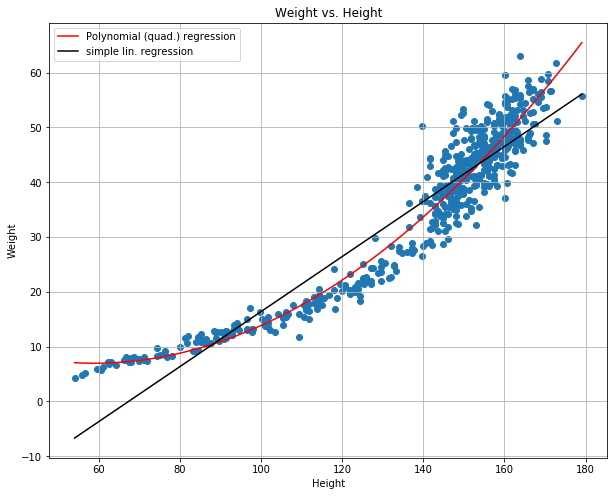

In [28]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.title("Weight vs. Height")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(x1_data, y_data_quad, color = 'r',label = 'Polynomial (quad.) regression')
plt.plot(x_data_lin, y_data_lin, color = 'k', label = 'simple lin. regression')
plt.grid()
plt.legend(loc = 'best')
plt.show()

### Prediction of quadratic model on entire dataset

In [29]:
y_pred_quad = model.predict(X)
y_pred_quad.shape

(544,)

In [30]:
mse_quad = mean_squared_error(y_true = y, y_pred = y_pred_quad)

r2_quad = r2_score(y_true = y, y_pred = y_pred_quad)

print("For quadratic model Mean Squared error = {} and R2 score = {}".format(mse_quad, r2_quad))

For quadratic model Mean Squared error = 15.454214661127608 and R2 score = 0.9285373880898893


In [31]:
print("For linear model Mean Squared error = {} and R2 score = {}".format(mse_lin, r2_lin))

For linear model Mean Squared error = 24.837769453118856 and R2 score = 0.8851464200503394


The $R^2$ Score and Mean Square Error suggest that quadratic polynomial is a better fit for the given dataset than simple linear model.